In [1]:
# IMPORT NECESSARY LIBRARIES
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K
from tensorflow.keras.models import Sequential, load_model
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import soundfile as sf
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
seed=7
np.random.seed(seed)
from matplotlib.pyplot import specgram
import glob 
import IPython.display as ipd  # To play sound in the notebook
import pickle
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
CREMA = "/content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/"
# Run one example 
dir_list = os.listdir(CREMA)
dir_list[0:15]

In [ ]:
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('Male_Sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('Male_Angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('Male_Disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('Male_Fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('Male_Happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('Male_Neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('Female_Sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('Female_Angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('Female_Disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('Female_Fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('Female_Happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('Female_Neutral')
    else:
        emotion.append('Unknown_Emotion')
    path.append(CREMA + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

Male_Angry        671
Male_Disgust      671
Male_Fear         671
Male_Happy        671
Male_Sad          671
Female_Happy      600
Female_Sad        600
Female_Disgust    600
Female_Fear       600
Female_Angry      600
Male_Neutral      575
Female_Neutral    512
Name: labels, dtype: int64

In [ ]:
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and (temp == 'male' or temp == 'female'):
        emotion.append('Sad')
    elif part[2] == 'ANG' and (temp == 'male' or temp == 'female'):
        emotion.append('Angry')
    elif part[2] == 'DIS' and (temp == 'male' or temp == 'female'):
        emotion.append('Disgust')
    elif part[2] == 'FEA' and (temp == 'male' or temp == 'female'):
        emotion.append('Fear')
    elif part[2] == 'HAP' and (temp == 'male' or temp == 'female'):
        emotion.append('Happy')
    elif part[2] == 'NEU' and (temp == 'male' or temp == 'female'):
        emotion.append('Neutral')
    else:
        emotion.append('Unknown_Emotion')
    path.append(CREMA + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

Sad        1271
Happy      1271
Angry      1271
Fear       1271
Disgust    1271
Neutral    1087
Name: labels, dtype: int64

In [ ]:
df = pd.concat([CREMA_df], axis = 0)
print(df.labels.value_counts())
df.head()
df.to_csv("Data_path.csv",index=False)

Sad        1271
Happy      1271
Angry      1271
Fear       1271
Disgust    1271
Neutral    1087
Name: labels, dtype: int64


In [ ]:
# lets pick up the meta-data that we got from our first part of the Kernel
ref = pd.read_csv("./Data_path.csv")
ref.head(30)

,labels,source,path
0,Fear,CREMA,/content/drive/MyDrive/Speech Emotion analysis...
1,Angry,CREMA,/content/drive/MyDrive/Speech Emotion analysis...
2,Happy,CREMA,/content/drive/MyDrive/Speech Emotion analysis...
3,Disgust,CREMA,/content/drive/MyDrive/Speech Emotion analysis...
4,Sad,CREMA,/content/drive/MyDrive/Speech Emotion analysis...
5,Neutral,CREMA,/content/drive/MyDrive/Speech Emotion analysis...
6,Angry,CREMA,/content/drive/MyDrive/Speech Emotion analysis...
7,Neutral,CREMA,/content/drive/MyDrive/Speech Emotion analysis...
8,Sad,CREMA,/content/drive/MyDrive/Speech Emotion analysis...
9,Angry,CREMA,/content/drive/MyDrive/Speech Emotion analysis...


In [ ]:
# ENSURE GENDER,EMOTION, AND ACTOR COLUMN VALUES ARE CORRECT
pd.set_option('display.max_colwidth', -1)
df.sample(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,labels,source,path
1306,Angry,CREMA,/content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/1071_IOM_ANG_XX.wav
3628,Sad,CREMA,/content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/1050_TSI_SAD_XX.wav
6976,Angry,CREMA,/content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/1018_ITS_ANG_XX.wav
101,Neutral,CREMA,/content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/1080_WSI_NEU_XX.wav
515,Fear,CREMA,/content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/1086_IOM_FEA_XX.wav
...,...,...,...
5275,Sad,CREMA,/content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/1022_IEO_SAD_MD.wav
1749,Sad,CREMA,/content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/1076_TAI_SAD_XX.wav
6832,Disgust,CREMA,/content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/1016_TAI_DIS_XX.wav
1434,Disgust,CREMA,/content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/1073_DFA_DIS_XX.wav


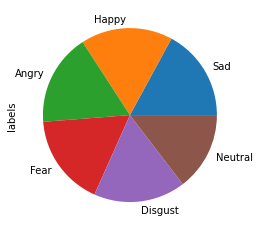

In [ ]:
# LOOK AT DISTRIBUTION OF CLASSES
df.labels.value_counts().plot(kind='pie') 

In [ ]:
# Note this takes a couple of minutes (~10 mins) as we're iterating over 4 datasets 
df = pd.DataFrame(columns=['mfcc'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  , res_type='kaiser_fast'
                                  ,duration=3
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    
    # mean as the feature. Could do min and max etc as well. 
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=13),
                    axis=0)
    df.loc[counter] = [mfccs]
    counter=counter+1   

# Check a few records to make sure its processed successfully
print(len(df))
df.head()

7442


,mfcc
0,"[-18.468584, -20.254374, -20.04526, -19.794085..."
1,"[-21.58118, -18.51611, -16.883614, -17.155048,..."
2,"[-17.71445, -17.28498, -16.014097, -16.553043,..."
3,"[-18.93934, -20.214577, -18.278427, -17.682793..."
4,"[-20.4068, -16.727484, -15.03398, -13.564312, ..."


In [ ]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df['mfcc'].values.tolist())],axis=1)
df[:5]


,labels,source,path,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258
0,Fear,CREMA,/content/drive/MyDrive/Speech Emotion analysis...,-18.468584,-20.254374,-20.045259,-19.794085,-19.704294,-18.854753,-18.924606,-17.283781,-17.075590,-19.938087,-17.892668,-17.199591,-17.971672,-17.560362,-17.182625,-16.661360,-18.334368,-17.992323,-18.829758,-18.894726,-16.431572,-17.689421,-17.427372,-18.092073,-18.310465,-17.776354,-17.483345,-17.686874,-19.213612,-18.129242,-17.432905,-17.203876,-16.882948,-15.406959,-15.672686,-16.630341,-16.363436,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Angry,CREMA,/content/drive/MyDrive/Speech Emotion analysis...,-21.581181,-18.516109,-16.883614,-17.155048,-18.202353,-19.137348,-19.473928,-18.893873,-17.578300,-18.080847,-17.257664,-17.873304,-17.368299,-15.866547,-17.153877,-16.644749,-16.051394,-15.027754,-15.599523,-15.704085,-10.835872,-11.491006,-15.709057,-14.274506,-14.912325,-10.584539,-9.459837,-13.033881,-11.953256,-10.701216,-11.526600,-12.298338,-11.487062,-11.670027,-11.791986,-11.952897,-11.616622,...,-20.413237,-16.681173,-15.683807,-15.987213,-17.783182,-15.536849,-16.843615,-19.066589,-19.222788,-19.615808,-19.933821,-18.932274,-18.388811,-18.750616,-18.159132,-17.842165,-17.846712,-17.504179,-19.033979,-19.274513,-19.572651,-17.542921,-15.425191,-17.232868,-18.962437,-17.740585,-17.344984,-17.438631,-24.643398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Happy,CREMA,/content/drive/MyDrive/Speech Emotion analysis...,-17.714451,-17.284981,-16.014097,-16.553043,-16.953815,-16.536219,-14.834059,-14.632192,-17.452562,-16.035688,-15.754540,-16.072802,-17.083910,-19.426931,-19.487083,-17.536039,-15.821034,-14.596391,-14.642608,-16.461107,-16.371967,-16.833181,-18.062946,-18.473057,-17.973755,-17.981022,-16.027866,-15.538352,-15.136353,-14.047176,-11.870957,-11.019601,-10.395377,-10.737220,-8.728930,-8.448466,-11.563546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Disgust,CREMA,/content/drive/MyDrive/Speech Emotion analysis...,-18.939341,-20.214577,-18.278427,-17.682793,-19.282566,-19.843426,-20.453449,-20.122419,-20.333952,-20.178904,-18.748684,-19.074993,-17.404778,-18.045435,-19.402706,-18.614048,-17.489475,-17.672113,-17.449711,-15.691146,-15.600727,-17.192768,-17.943962,-17.392731,-18.508499,-19.978947,-21.501980,-18.050428,-16.173214,-16.206423,-13.323647,-14.181124,-14.119841,-14.953592,-17.337978,-17.198235,-17.412226,...,-18.097691,-18.083668,-18.356276,-16.141829,-17.361177,-20.605534,-19.126207,-18.952997,-21.129801,-19.297440,-19.349184,-18.660292,-18.995369,-20.582642,-21.421822,-20.039925,-18.717186,-18.814693,-19.449501,-18.886389,-17.225548,-16.786970,-19.325356,-19.989927,-18.626207,-18.573174,-18.269663,-17.438444,-17.409807,-17.819359,-18.706387,-19.473703,-22.109062,-21.330486,-20.612425,-18.9967,-19.484909,-20.216755,-20.222849,-22.439045
4,Sad,CREMA,/content/drive/MyDrive/Speech Emotion analysis...,-20.406799,-16.727484,-15.033980,-13.564312,-12.529979,-12.834930,-16.485886,-12.769383,-11.444147,-11.550498,-14.279906,-15.245625,-13.698762,-16.913940,-20.256510,-19.093105,-17.164070,-16.333908,-17.092419,-16.842167,-17.948620,-18.812250,-18.994915,-18.539921,-18.098610,-17.709007,-15.798827,-18.708548,-16.069548,-14.653702,-16.223072,-16.967506,-18.676319,-19.759369,-18.365721,-18.994234,-17.809534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# replace NA with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(7442, 262)


,labels,source,path,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258
0,Fear,CREMA,/content/drive/MyDrive/Speech Emotion analysis...,-18.468584,-20.254374,-20.045259,-19.794085,-19.704294,-18.854753,-18.924606,-17.283781,-17.075590,-19.938087,-17.892668,-17.199591,-17.971672,-17.560362,-17.182625,-16.661360,-18.334368,-17.992323,-18.829758,-18.894726,-16.431572,-17.689421,-17.427372,-18.092073,-18.310465,-17.776354,-17.483345,-17.686874,-19.213612,-18.129242,-17.432905,-17.203876,-16.882948,-15.406959,-15.672686,-16.630341,-16.363436,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
1,Angry,CREMA,/content/drive/MyDrive/Speech Emotion analysis...,-21.581181,-18.516109,-16.883614,-17.155048,-18.202353,-19.137348,-19.473928,-18.893873,-17.578300,-18.080847,-17.257664,-17.873304,-17.368299,-15.866547,-17.153877,-16.644749,-16.051394,-15.027754,-15.599523,-15.704085,-10.835872,-11.491006,-15.709057,-14.274506,-14.912325,-10.584539,-9.459837,-13.033881,-11.953256,-10.701216,-11.526600,-12.298338,-11.487062,-11.670027,-11.791986,-11.952897,-11.616622,...,-20.413237,-16.681173,-15.683807,-15.987213,-17.783182,-15.536849,-16.843615,-19.066589,-19.222788,-19.615808,-19.933821,-18.932274,-18.388811,-18.750616,-18.159132,-17.842165,-17.846712,-17.504179,-19.033979,-19.274513,-19.572651,-17.542921,-15.425191,-17.232868,-18.962437,-17.740585,-17.344984,-17.438631,-24.643398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
2,Happy,CREMA,/content/drive/MyDrive/Speech Emotion analysis...,-17.714451,-17.284981,-16.014097,-16.553043,-16.953815,-16.536219,-14.834059,-14.632192,-17.452562,-16.035688,-15.754540,-16.072802,-17.083910,-19.426931,-19.487083,-17.536039,-15.821034,-14.596391,-14.642608,-16.461107,-16.371967,-16.833181,-18.062946,-18.473057,-17.973755,-17.981022,-16.027866,-15.538352,-15.136353,-14.047176,-11.870957,-11.019601,-10.395377,-10.737220,-8.728930,-8.448466,-11.563546,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
3,Disgust,CREMA,/content/drive/MyDrive/Speech Emotion analysis...,-18.939341,-20.214577,-18.278427,-17.682793,-19.282566,-19.843426,-20.453449,-20.122419,-20.333952,-20.178904,-18.748684,-19.074993,-17.404778,-18.045435,-19.402706,-18.614048,-17.489475,-17.672113,-17.449711,-15.691146,-15.600727,-17.192768,-17.943962,-17.392731,-18.508499,-19.978947,-21.501980,-18.050428,-16.173214,-16.206423,-13.323647,-14.181124,-14.119841,-14.953592,-17.337978,-17.198235,-17.412226,...,-18.097691,-18.083668,-18.356276,-16.141829,-17.361177,-20.605534,-19.126207,-18.952997,-21.129801,-19.297440,-19.349184,-18.660292,-18.995369,-20.582642,-21.421822,-20.039925,-18.717186,-18.814693,-19.449501,-18.886389,-17.225548,-16.786970,-19.325356,-19.989927,-18.626207,-18.573174,-18.269663,-17.438444,-17.409807,-17.819359,-18.706387,-19.473703,-22.109062,-21.330486,-20.612425,-18.9967,-19.484909,-20.216755,-20.222849,-22.439045
4,Sad,CREMA,/content/drive/MyDrive/Speech Emotion analysis...,-20.406799,-16.727484,-15.033980,-13.564312,-12.529979,-12.834930,-16.485886,-12.769383,-11.444147,-11.550498,-14.279906,-15.245625,-13.698762,-16.913940,-20.256510,-19.093105,-17.16407

In [ ]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation 
X_train[15:70]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258
51,-18.811003,-17.791302,-17.157402,-18.607573,-19.379992,-18.288500,-18.091801,-17.649771,-16.494352,-17.785625,-18.489830,-19.529362,-20.600594,-19.967094,-17.529179,-15.388712,-13.523406,-14.677562,-15.549698,-16.601418,-16.674187,-15.680116,-15.665847,-18.509884,-17.615519,-16.297245,-18.820686,-15.997000,-15.315182,-15.856749,-15.942890,-13.154741,-11.958857,-12.467591,-13.573188,-13.570748,-15.152555,-16.061350,-17.368349,-16.080589,...,-18.929914,-21.235161,-19.962553,-17.739302,-17.703611,-17.739546,-20.102438,-23.143278,-27.976000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1499,-14.245870,-16.312931,-19.356106,-19.375355,-17.309563,-17.121941,-18.362131,-17.069994,-18.102665,-20.374474,-20.343546,-19.775957,-18.668121,-16.569096,-16.296499,-18.513521,-17.470081,-17.180017,-15.569881,-16.002171,-18.380739,-17.243582,-16.966997,-16.247438,-16.950254,-18.268597,-18.295092,-16.180332,-16.113380,-16.539898,-16.256760,-17.655102,-18.683521,-17.854246,-18.081316,-18.450594,-17.204069,-16.305433,-16.328577,-16.222202,...,-16.120100,-17.608889,-17.656691,-18.093941,-19.347712,-20.564548,-18.886925,-18.777260,-18.958569,-17.962084,-18.414291,-18.243816,-18.082554,-21.327820,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1109,-20.010965,-18.804390,-18.666359,-18.666954,-16.787706,-14.493404,-15.556139,-16.836004,-16.878168,-17.745125,-14.641143,-12.395106,-12.131112,-11.372519,-11.810122,-10.430413,-8.783098,-8.960990,-8.745554,-11.181583,-9.691066,-7.860650,-8.458157,-10.537596,-13.055754,-16.300661,-15.192734,-14.987411,-17.160492,-14.664274,-12.714074,-8.798843,-5.467309,-6.192080,-4.231398,-1.945175,-0.933643,-2.946992,-4.159125,-3.885706,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3794,-3.634196,-8.618714,-15.100697,-14.949137,-14.740988,-16.150551,-16.691196,-18.275894,-16.568932,-16.757633,-16.406618,-16.835827,-17.882311,-16.212872,-15.898714,-16.899914,-19.427721,-21.455727,-19.092705,-16.676805,-14.748487,-15.526275,-16.103083,-16.310539,-14.669949,-13.467600,-13.244771,-15.342305,-17.189259,-14.868049,-13.488153,-15.610473,-14.234900,-13.435836,-14.377288,-14.674430,-13.058980,-13.915819,-13.673827,-13.304485,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
6773,-19.063738,-19.369392,-19.669140,-20.299931,-20.216703,-18.313257,-14.858878,-16.469690,-16.304512,-17.149029,-18.886478,-17.572735,-16.165586,-15.253493,-15.734106,-17.310383,-17.598871,-17.545866,-18.639204,-17.801908,-16.264938,-18.781656,-18.384150,-18.155157,-19.043921,-17.867983,-16.718353,-16.562542,-17.387192,-16.638523,-16.867420,-16.631636,-18.551083,-19.454556,-19.937653,-21.776258,-19.600103,-19.478645,-16.669750,-15.414791,...,0.000000,0.000000,0.0

In [ ]:
# TRAIN TEST SPLIT DATA
train,test = train_test_split(df, test_size=0.20, random_state=0)
# Define the K-fold Cross Validator
kfold = KFold(n_splits=2, shuffle=True)
acc_per_fold = []
loss_per_fold = []
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR 
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

print(X_train.shape)
print(X_test.shape)

inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
inputs.shape
targets.shape

[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]
(5953, 259, 1)
(1489, 259, 1)


(7442, 6)

In [ ]:
lb.classes_

array(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad'],
      dtype=object)

In [ ]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
  model = tf.keras.Sequential()
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same", activation='relu', input_shape=(X_train.shape[1],1)))
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,activation='relu',dilation_rate=1,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  
  model.add(layers.Flatten())
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(12, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
  model.summary()
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  checkpoint = ModelCheckpoint("SER_best_initial_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', period=1, save_weights_only=True)
  model_history=model.fit(inputs[train], targets[train],batch_size=32, epochs=1000, validation_data=(X_test, y_test),callbacks=[checkpoint])
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  # Increase fold number
  fold_no = fold_no + 1
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Streaming output truncated to the last 5000 lines.

Epoch 00773: val_accuracy did not improve from 0.54399
Epoch 774/1000
117/117 [==============================] - 2s 19ms/step - loss: 1.1459 - accuracy: 0.6411 - val_loss: 1.7758 - val_accuracy: 0.5171

Epoch 00774: val_accuracy did not improve from 0.54399
Epoch 775/1000
117/117 [==============================] - 2s 19ms/step - loss: 1.1144 - accuracy: 0.6421 - val_loss: 1.8326 - val_accuracy: 0.5212

Epoch 00775: val_accuracy did not improve from 0.54399
Epoch 776/1000
117/117 [==============================] - 2s 19ms/step - loss: 1.1636 - accuracy: 0.6304 - val_loss: 1.7030 - val_accuracy: 0.5373

Epoch 00776: val_accuracy did not improve from 0.54399
Epoch 777/1000
117/117 [==============================] - 2s 20ms/step - loss: 1.1298 - accuracy: 0.6371 - val_loss: 1.7284 - val_accuracy: 0.5292

Epoch 00777: val_accuracy did not improve from 0.54399
Epoch 778/1000
117/117 [==============================] - 2s 20ms/step - loss: 1.

47/47 [==============================] - 0s 6ms/step - loss: 1.5759 - accuracy: 0.6125
Loss of the model is -  1.5759215354919434
47/47 [==============================] - 0s 5ms/step - loss: 1.5759 - accuracy: 0.6125
Accuracy of the model is -  61.24916076660156 %


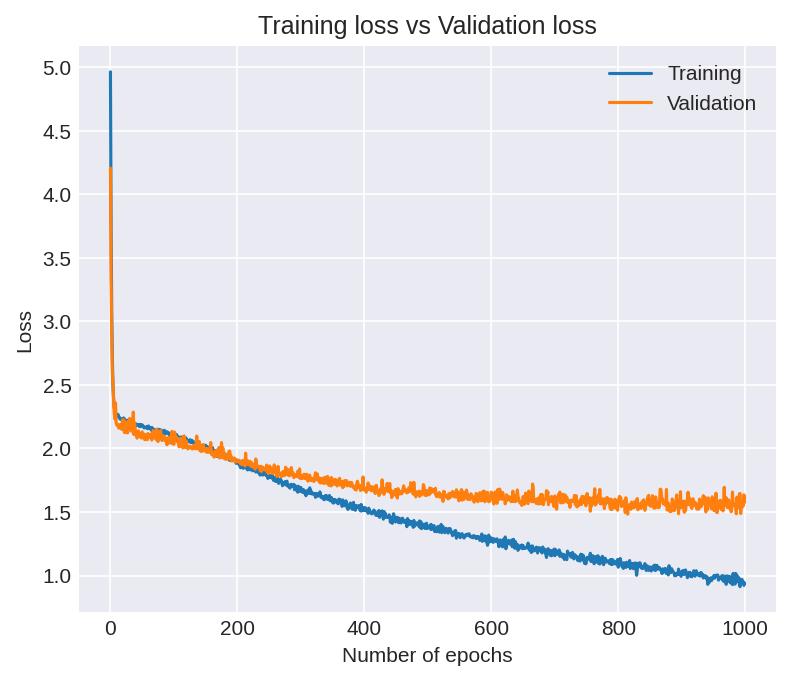

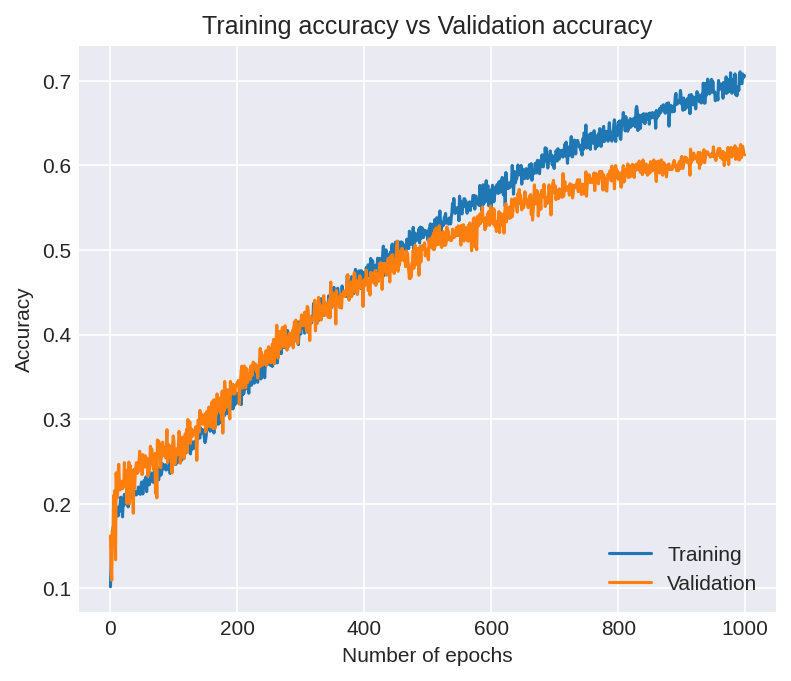

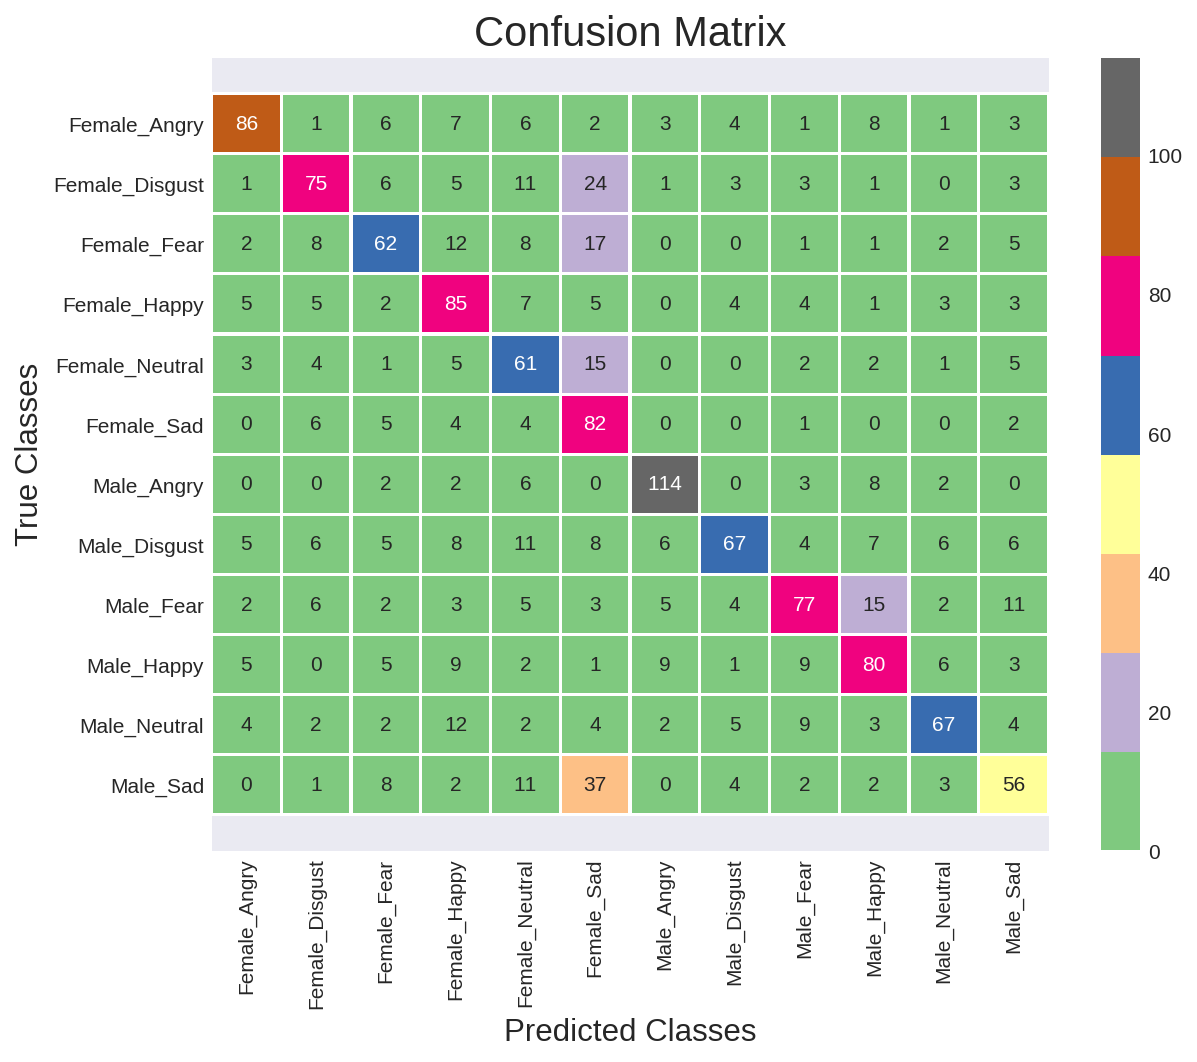

                precision    recall  f1-score   support

  Female_Angry       0.76      0.67      0.71       128
Female_Disgust       0.66      0.56      0.61       133
   Female_Fear       0.58      0.53      0.55       118
  Female_Happy       0.55      0.69      0.61       124
Female_Neutral       0.46      0.62      0.52        99
    Female_Sad       0.41      0.79      0.54       104
    Male_Angry       0.81      0.83      0.82       137
  Male_Disgust       0.73      0.48      0.58       139
     Male_Fear       0.66      0.57      0.61       135
    Male_Happy       0.62      0.62      0.62       130
  Male_Neutral       0.72      0.58      0.64       116
      Male_Sad       0.55      0.44      0.49       126

      accuracy                           0.61      1489
     macro avg       0.63      0.61      0.61      1489
  weighted avg       0.64      0.61      0.61      1489



In [ ]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
# Plot the results
train_loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
train_acc=model_history.history['accuracy']
val_acc=model_history.history['val_accuracy']
plt.rcParams['figure.dpi'] = 150 
plt.figure(1,figsize=(6,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training loss vs Validation loss')
plt.grid(True)
plt.legend(['Training','Validation'], loc=1)
plt.style.use(['seaborn-darkgrid'])

plt.rcParams['figure.dpi'] = 150 
plt.figure(2,figsize=(6,5))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.grid(True)
plt.legend(['Training','Validation'],loc=4)
plt.style.use(['seaborn-darkgrid'])     
# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%") 

# PREDICTION LABELS
predictions = model.predict(X_test, batch_size=32)
predictions=predictions.argmax(axis=1)
predictions
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions}) 

# ACTUAL LABELS
TRUE = y_test.argmax(axis=1)
TRUE = TRUE.astype(int).flatten()
TRUE = (lb.inverse_transform((TRUE)))
TRUE = pd.DataFrame({'TRUE Values': TRUE})

# COMBINE PREDICTION AND ACTUAL LABELS
finaldf = TRUE.join(predictions)
finaldf[40:50] 
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(TRUE, predictions)
plt.figure(figsize = (9, 7))
plt.rcParams['figure.dpi'] = 200 
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()   
print(classification_report(TRUE, predictions, target_names = ['Female_Angry', 'Female_Disgust', 'Female_Fear', 'Female_Happy','Female_Neutral', 'Female_Sad', 'Male_Angry', 'Male_Disgust','Male_Fear', 'Male_Happy', 'Male_Neutral', 'Male_Sad']))

In [ ]:
# PREDICTION LABELS
predictions = model.predict(X_test, batch_size=32)
predictions=predictions.argmax(axis=1)
predictions
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions})

# ACTUAL LABELS
TRUE = y_test.argmax(axis=1)
TRUE = TRUE.astype(int).flatten()
TRUE = (lb.inverse_transform((TRUE)))
TRUE = pd.DataFrame({'True Values': TRUE})

# COMBINE PREDICTION AND TRUE LABELS
finaldf = TRUE.join(predictions)
finaldf[100:150] 

,True Values,Predicted Values
100,Female_Disgust,Female_Disgust
101,Female_Fear,Female_Fear
102,Female_Fear,Female_Neutral
103,Female_Sad,Female_Sad
104,Female_Sad,Male_Fear
105,Female_Fear,Female_Neutral
106,Female_Angry,Female_Angry
107,Male_Disgust,Male_Disgust
108,Male_Disgust,Male_Disgust
109,Female_Happy,Female_Happy


In [ ]:
from sklearn.svm import SVC

svclassifier = SVC(kernel = 'linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

                precision    recall  f1-score   support

  Female_Angry       0.21      0.20      0.21       128
Female_Disgust       0.20      0.19      0.20       133
   Female_Fear       0.10      0.09      0.10       118
  Female_Happy       0.08      0.07      0.07       124
Female_Neutral       0.14      0.13      0.14        99
    Female_Sad       0.19      0.27      0.22       104
    Male_Angry       0.48      0.59      0.53       137
  Male_Disgust       0.10      0.11      0.11       139
     Male_Fear       0.10      0.09      0.10       135
    Male_Happy       0.26      0.31      0.28       130
  Male_Neutral       0.15      0.09      0.12       116
      Male_Sad       0.13      0.13      0.13       126

      accuracy                           0.19      1489
     macro avg       0.18      0.19      0.18      1489
  weighted avg       0.18      0.19      0.19      1489

----accuracy score 19.274680993955677 ----


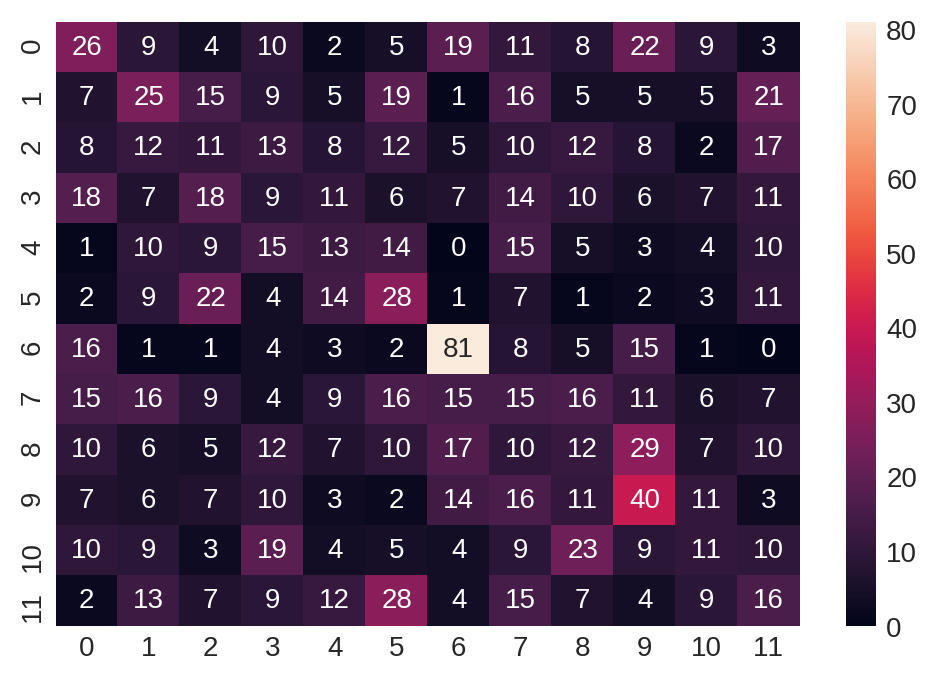

----train accuracy score 37.34251637829666 ----
----test accuracy score 19.274680993955677 ----


In [ ]:
y_pred = svclassifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn

print(classification_report(y_test,y_pred))

acc = float(accuracy_score(y_test,y_pred))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

train_acc = float(svclassifier.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(svclassifier.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

Accuracy: 20.95%
                precision    recall  f1-score   support

  Female_Angry       0.27      0.18      0.22       128
Female_Disgust       0.21      0.08      0.12       133
   Female_Fear       0.07      0.02      0.03       118
  Female_Happy       0.12      0.08      0.10       124
Female_Neutral       0.08      0.11      0.09        99
    Female_Sad       0.22      0.55      0.31       104
    Male_Angry       0.40      0.61      0.48       137
  Male_Disgust       0.11      0.09      0.10       139
     Male_Fear       0.18      0.20      0.19       135
    Male_Happy       0.25      0.25      0.25       130
  Male_Neutral       0.16      0.12      0.14       116
      Male_Sad       0.17      0.24      0.20       126

      accuracy                           0.21      1489
     macro avg       0.19      0.21      0.19      1489
  weighted avg       0.19      0.21      0.19      1489

                precision    recall  f1-score   support

  Female_Angry       0.27  

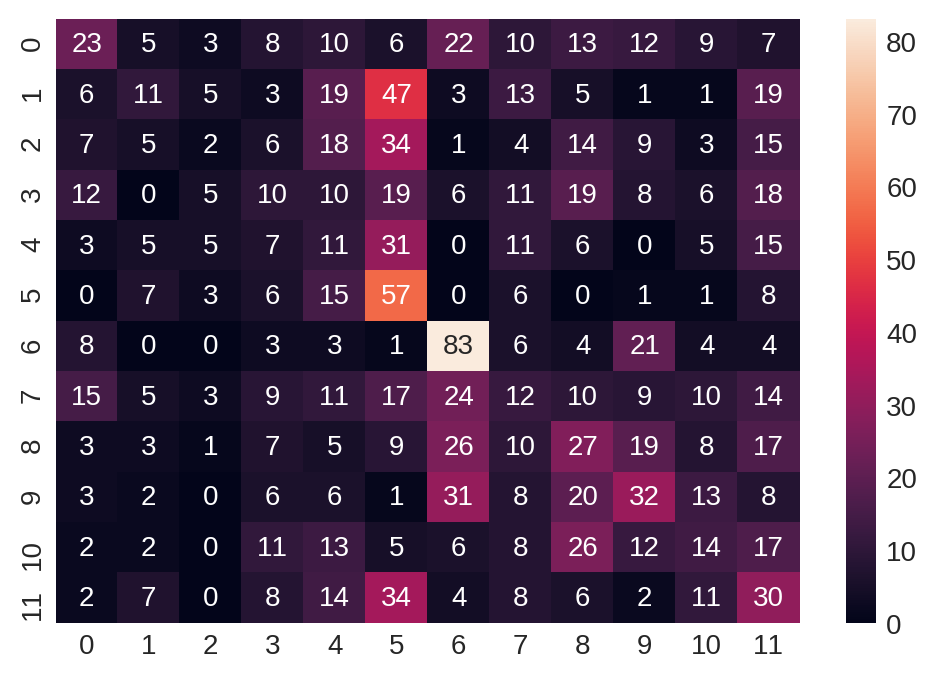

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(512,), learning_rate='adaptive', max_iter=500)

# Train the model
model.fit(X_train,y_train)

# Predict for the test set
y_pred=model.predict(X_test)

# Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn

print(classification_report(y_test,y_pred))

acc = float(accuracy_score(y_test,y_pred))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [ ]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
  model = tf.keras.Sequential()
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same", activation='relu', input_shape=(X_train.shape[1],1)))
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,activation='relu',dilation_rate=1,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  
  model.add(layers.Flatten())
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(12, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='Sgd',metrics=['accuracy'])
  model.summary()
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  checkpoint = ModelCheckpoint("SER_best_initial_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', period=1, save_weights_only=True)
  model_history=model.fit(inputs[train], targets[train],batch_size=32, epochs=1000, validation_data=(X_test, y_test),callbacks=[checkpoint])
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  # Increase fold number
  fold_no = fold_no + 1
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Streaming output truncated to the last 5000 lines.
Epoch 773/1000
117/117 [==============================] - 2s 19ms/step - loss: 1.0031 - accuracy: 0.6729 - val_loss: 1.9355 - val_accuracy: 0.5641

Epoch 00773: val_accuracy did not improve from 0.56951
Epoch 774/1000
117/117 [==============================] - 2s 19ms/step - loss: 1.0206 - accuracy: 0.6701 - val_loss: 1.9578 - val_accuracy: 0.5635

Epoch 00774: val_accuracy did not improve from 0.56951
Epoch 775/1000
117/117 [==============================] - 2s 20ms/step - loss: 1.0280 - accuracy: 0.6626 - val_loss: 1.9027 - val_accuracy: 0.5682

Epoch 00775: val_accuracy did not improve from 0.56951
Epoch 776/1000
117/117 [==============================] - 2s 19ms/step - loss: 1.0426 - accuracy: 0.6605 - val_loss: 1.8704 - val_accuracy: 0.5702

Epoch 00776: val_accuracy improved from 0.56951 to 0.57018, saving model to SER_best_initial_model.hdf5
Epoch 777/1000
117/117 [==============================] - 2s 19ms/step - loss: 1.0144 - 

47/47 [==============================] - 0s 6ms/step - loss: 1.9307 - accuracy: 0.6293
Loss of the model is -  1.9306786060333252
47/47 [==============================] - 0s 5ms/step - loss: 1.9307 - accuracy: 0.6293
Accuracy of the model is -  62.92814016342163 %


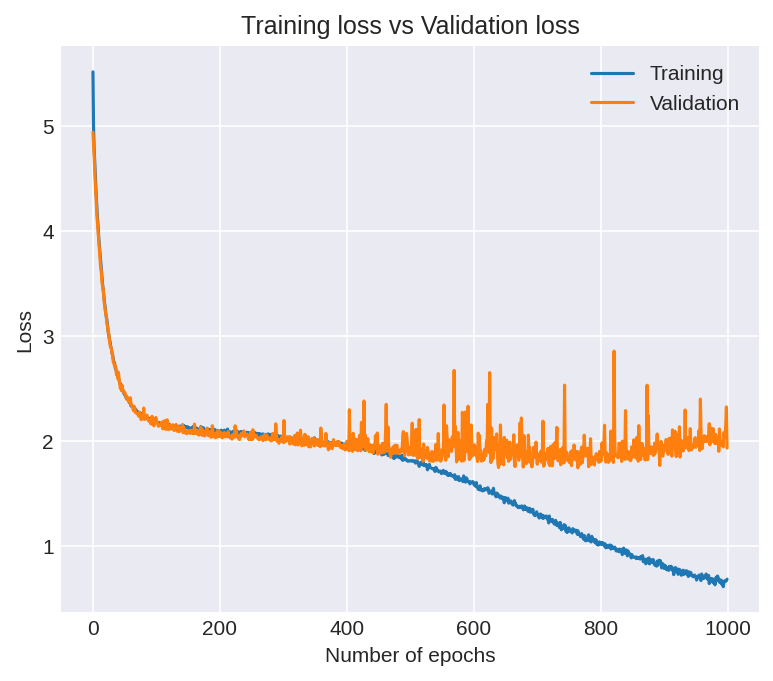

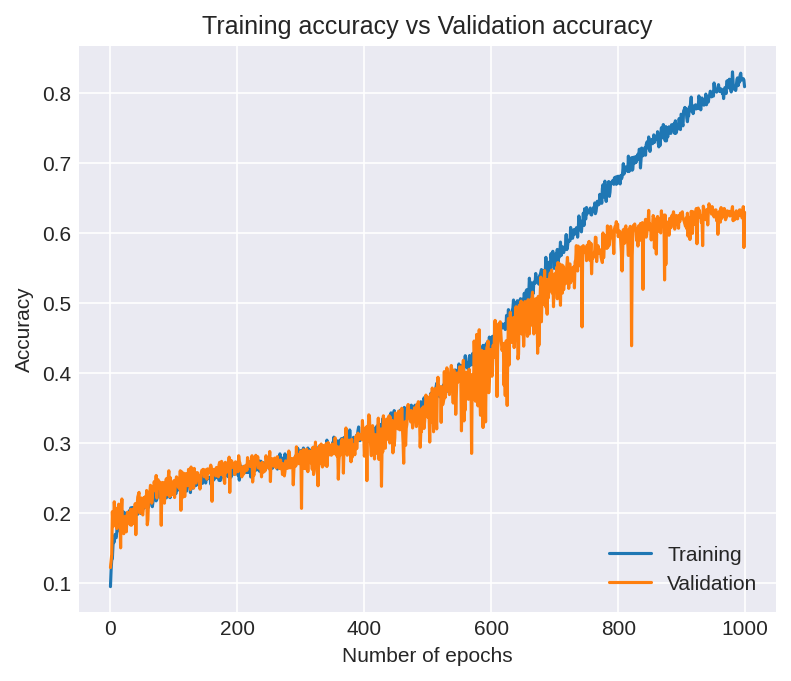

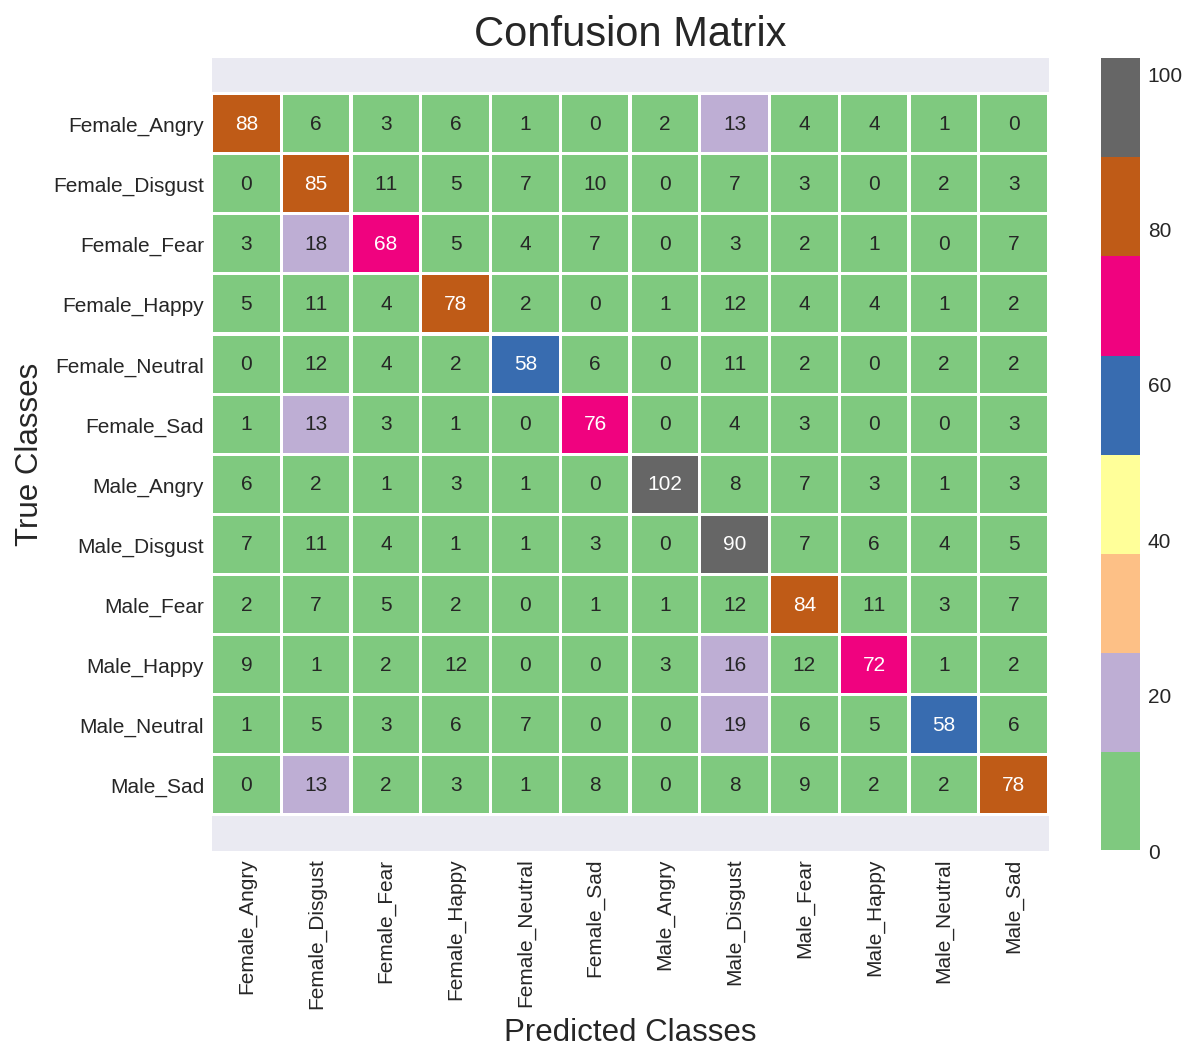

                precision    recall  f1-score   support

  Female_Angry       0.72      0.69      0.70       128
Female_Disgust       0.46      0.64      0.54       133
   Female_Fear       0.62      0.58      0.60       118
  Female_Happy       0.63      0.63      0.63       124
Female_Neutral       0.71      0.59      0.64        99
    Female_Sad       0.68      0.73      0.71       104
    Male_Angry       0.94      0.74      0.83       137
  Male_Disgust       0.44      0.65      0.53       139
     Male_Fear       0.59      0.62      0.60       135
    Male_Happy       0.67      0.55      0.61       130
  Male_Neutral       0.77      0.50      0.61       116
      Male_Sad       0.66      0.62      0.64       126

      accuracy                           0.63      1489
     macro avg       0.66      0.63      0.64      1489
  weighted avg       0.65      0.63      0.63      1489



In [ ]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
# Plot the results
train_loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
train_acc=model_history.history['accuracy']
val_acc=model_history.history['val_accuracy']
plt.rcParams['figure.dpi'] = 150 
plt.figure(1,figsize=(6,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training loss vs Validation loss')
plt.grid(True)
plt.legend(['Training','Validation'], loc=1)
plt.style.use(['seaborn-darkgrid'])

plt.rcParams['figure.dpi'] = 150 
plt.figure(2,figsize=(6,5))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.grid(True)
plt.legend(['Training','Validation'],loc=4)
plt.style.use(['seaborn-darkgrid'])     
# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%") 

# PREDICTION LABELS
predictions = model.predict(X_test, batch_size=32)
predictions=predictions.argmax(axis=1)
predictions
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions}) 

# ACTUAL LABELS
TRUE = y_test.argmax(axis=1)
TRUE = TRUE.astype(int).flatten()
TRUE = (lb.inverse_transform((TRUE)))
TRUE = pd.DataFrame({'TRUE Values': TRUE})

# COMBINE PREDICTION AND ACTUAL LABELS
finaldf = TRUE.join(predictions)
finaldf[40:50] 
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(TRUE, predictions)
plt.figure(figsize = (9, 7))
plt.rcParams['figure.dpi'] = 150 
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()   
print(classification_report(TRUE, predictions, target_names = ['Female_Angry', 'Female_Disgust', 'Female_Fear', 'Female_Happy','Female_Neutral', 'Female_Sad', 'Male_Angry', 'Male_Disgust','Male_Fear', 'Male_Happy', 'Male_Neutral', 'Male_Sad']))

In [ ]:
# ITERATE OVER ALL AUDIO FILES AND EXTRACT LOG MEL SPECTROGRAM MEAN VALUES INTO DF FOR MODELING
import pandas as pd 
df_mel = pd.DataFrame(columns=['mel_spectrogram'])

counter=0

for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
    
    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000) 
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)
        
    # Mel-frequency cepstral coefficients (MFCCs)
#     mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
#     mfcc=np.mean(mfcc,axis=0)
    
    # compute chroma energy (pertains to 12 different pitch classes)
#     chroma = librosa.feature.chroma_stft(y=X, sr=sample_rate)
#     chroma = np.mean(chroma, axis = 0)

    # compute spectral contrast
#     contrast = librosa.feature.spectral_contrast(y=X, sr=sample_rate)
#     contrast = np.mean(contrast, axis= 0)

    # compute zero-crossing-rate (zcr:the zcr is the rate of sign changes along a signal i.e.m the rate at 
#     which the signal changes from positive to negative or back - separation of voiced andunvoiced speech.)
#     zcr = librosa.feature.zero_crossing_rate(y=X)
#     zcr = np.mean(zcr, axis= 0)
    
    df_mel.loc[counter] = [log_spectrogram]
    counter=counter+1   

print(len(df_mel))
df_mel.head()

7442


,mel_spectrogram
0,"[-43.254665, -41.894707, -41.50736, -41.845905, -41.429436, -41.245266, -41.361217, -41.227703, -40.461845, -41.412804, -40.846268, -41.3623, -41.832153, -41.681538, -41.29523, -41.154045, -41.41264, -41.244602, -41.98202, -42.75347, -41.39226, -41.348686, -41.4379, -41.160706, -40.68711, -40.217934, -40.00573, -40.61248, -41.625732, -42.034603, -36.170002, -29.743038, -28.243929, -28.24998, -27.77547, -27.573372, -26.677956, -27.175388, -25.75104, -25.647913, -25.644295, -26.668339, -26.613882, -26.356556, -26.77386, -27.072065, -26.074293, -24.921244, -24.15235, -24.197945, -24.11029, -23.707932, -22.837158, -23.120525, -24.53285, -25.841347, -26.868448, -29.331154, -27.962044, -24.725094, -23.502502, -23.915518, -23.807484, -23.29895, -23.742783, -23.666122, -24.211384, -25.644524, -26.583113, -26.444763, -27.152815, -27.83554, -27.551153, -28.68049, -29.932323, -32.111633, -34.198128, -34.29514, -30.36183, -28.504137, -26.403248, -24.029825, -22.023685, -20.688402, -21.068415, -22.280832, -22.060638, -22.541868, -21.63682, -20.952768, -20.330608, -20.08736, -18.601715, -17.550812, -17.681398, -17.489412, -18.064072, -18.179367, -19.748005, -22.72484, ...]"
1,"[-40.019615, -39.31888, -39.904377, -40.02183, -39.7744, -40.8256, -40.82349, -40.737755, -41.057842, -40.740757, -40.136665, -40.028328, -40.117958, -40.572502, -40.300655, -35.24541, -24.305656, -15.054026, -8.955327, -2.7201383, 0.27744636, -1.0039458, -4.1437182, -4.1187983, -3.8420486, -1.933307, -0.75382155, -2.0139916, -0.75526005, 0.047777623, -0.30212802, -1.1874824, -3.6547902, -6.1316867, -8.452853, -11.30334, -14.004723, -16.084105, -16.540083, -17.778452, -19.796635, -21.605957, -24.498129, -27.230345, -29.728199, -32.176083, -34.456665, -36.28285, -37.400898, -25.947212, -18.187666, -14.398182, -14.629947, -15.888034, -16.673199, -18.4791, -20.681215, -21.648506, -18.917936, -15.50431, -13.40712, -14.367907, -15.239616, -16.649841, -19.669367, -22.478567, -20.777355, -18.29374, -19.09197, -20.22023, -21.741661, -22.996912, -23.304562, -23.409668, -23.84636, -24.02098, -24.215906, -24.407848, -24.27158, -24.928518, -24.936184, -24.48702, -24.364403, -24.350449, -24.19308, -24.501657, -23.709763, -22.201773, -19.272923, -14.294683, -8.977521, -6.6504035, -2.879748, 0.39416853, 1.0489246, 1.3469497, 2.1773577, 1.1921353, -0.12913948, -1.9220965, ...]"
2,"[-15.580318, -15.911305, -17.518682, -19.048752, -19.429144, -16.564928, -14.74183, -14.812408, -14.376028, -13.032358, -14.965805, -17.70784, -18.401854, -18.235233, -19.405958, -20.558506, -21.887682, -22.177513, -22.965317, -23.708618, -24.430075, -25.152124, -26.091549, -27.673948, -29.468325, -30.421167, -31.037094, -24.765696, -19.497751, -12.414918, -7.563994, -5.362314, -4.4883647, -4.7024994, -5.8331637, -7.090183, -7.846556, -7.5027804, -8.487026, -9.828499, -12.006524, -14.435906, -16.7812, -19.036343, -21.555477, -24.318964, -26.88568, -29.030516, -30.30815, -30.67237, -26.97263, -25.407276, -24.284609, -20.942827, -19.638956, -19.041725, -17.656258, -17.25342, -17.436552, -18.236567, -19.620573, -20.720694, -21.78866, -22.698328, -24.438408, -25.903013, -26.853199, -27.082697, -25.182755, -21.599602, -16.753698, -13.096713, -11.33063, -9.949519, -9.123485, -10.370833, -11.907258, -12.728574, -13.230368, -12.4921875, -11.962813, -11.424604, -11.453296, -12.781526, -14.5663, -14.857618, -16.093336, -16.725306, -15.981659, -15.181727, -11.775486, -8.407348, -8.23784, -8.301277, -6.5105953, -7.8583894, -8.832267, -9.019757, -11.017051, -12.65295, ...]"
3,"[-40.956226, -40.079308, -39.446255, -39.76058, -40.143784, -41.29259, -40.380424, -40.26122, -40.638493, -40.964264, -40.928825, -41.187588, -41.057316, -41.34997, -41.327923, -41.84959, -41.73394, -40.820457, -41.046894, -41.37823, -41.581783, -41.257427, -41.459835, -41.81283, -41.993954, -42.28176, -42.14926, -35.91385, -29.323515, -26.782314, -25.163727, -24.740639, -24.7201, -25.553753, -27.333067, -28.155083, -27.908997,

In [ ]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df_mel['mel_spectrogram'].values.tolist())],axis=1)
df[:5]

,labels,source,path,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258
0,Male_Fear,CREMA,/content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/1080_DFA_FEA_XX.wav,-43.254665,-41.894707,-41.507359,-41.845905,-41.429436,-41.245266,-41.361217,-41.227703,-40.461845,-41.412804,-40.846268,-41.362301,-41.832153,-41.681538,-41.295231,-41.154045,-41.412640,-41.244602,-41.982021,-42.753471,-41.392262,-41.348686,-41.437901,-41.160706,-40.687111,-40.217934,-40.005730,-40.612480,-41.625732,-42.034603,-36.170002,-29.743038,-28.243929,-28.249981,-27.775471,-27.573372,-26.677956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female_Angry,CREMA,/content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/1079_TIE_ANG_XX.wav,-40.019615,-39.318878,-39.904377,-40.021832,-39.774399,-40.825600,-40.823490,-40.737755,-41.057842,-40.740757,-40.136665,-40.028328,-40.117958,-40.572502,-40.300655,-35.245411,-24.305656,-15.054026,-8.955327,-2.720138,0.277446,-1.003946,-4.143718,-4.118798,-3.842049,-1.933307,-0.753822,-2.013992,-0.755260,0.047778,-0.302128,-1.187482,-3.654790,-6.131687,-8.452853,-11.303340,-14.004723,...,-36.917877,-38.318645,-38.760109,-39.920071,-40.911449,-40.643059,-40.565529,-40.760902,-40.794411,-39.172459,-38.708679,-39.203808,-39.387131,-39.365116,-39.990623,-40.697979,-41.039429,-40.709435,-40.878113,-40.926418,-41.063534,-40.834015,-40.246269,-40.769169,-41.226864,-40.658245,-40.193859,-41.396072,-44.938881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Female_Happy,CREMA,/content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/1079_TIE_HAP_XX.wav,-15.580318,-15.911305,-17.518682,-19.048752,-19.429144,-16.564928,-14.741830,-14.812408,-14.376028,-13.032358,-14.965805,-17.707840,-18.401854,-18.235233,-19.405958,-20.558506,-21.887682,-22.177513,-22.965317,-23.708618,-24.430075,-25.152124,-26.091549,-27.673948,-29.468325,-30.421167,-31.037094,-24.765696,-19.497751,-12.414918,-7.563994,-5.362314,-4.488365,-4.702499,-5.833164,-7.090183,-7.846556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Male_Disgust,CREMA,/content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/1080_DFA_DIS_XX.wav,-40.956226,-40.079308,-39.446255,-39.760578,-40.143784,-41.292591,-40.380424,-40.261219,-40.638493,-40.964264,-40.928825,-41.187588,-41.057316,-41.349972,-41.327923,-41.849590,-41.733940,-40.820457,-41.046894,-41.378231,-41.581783,-41.257427,-41.459835,-41.812832,-41.993954,-42.281761,-42.149261,-35.913849,-29.323515,-26.782314,-25.163727,-24.740639,-24.720100,-25.553753,-27.333067,-28.155083,-27.908997,...,-41.574566,-41.870525,-42.048222,-40.838505,-41.084003,-41.631824,-41.705750,-41.008862,-41.340412,-41.682152,-41.676361,-41.355350,-41.168167,-40.743404,-41.133209,-41.489872,-41.999348,-42.161873,-42.136688,-42.250530,-42.306328,-41.692501,-42.004379,-41.694633,-41.819649,-41.610142,-41.413181,-41.510952,-41.156261,-41.200001,-41.864094,-41.066628,-40.980679,-41.341702,-42.008236,-41.03651,-41.369587,-41.386703,-41.103497,-42.741512
4,Female_Sad,CREMA,/content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/1079_WSI_SAD_XX.wav,-33.459328,-28.188782,-21.485540,-18.828327,-17.793709,-18.544792,-20.251371,-21.796410,-23.061543,-24.098564,-25.352997,-27.197796,-29.428326,-32.233021,-34.638428,-35.979752,-37.011772,-38.177521,-39.668858,-39.877171,-38.616947,-35.876579,-31.987782,-32.020302,-33.627113,-32.738708,-28.308184,-25.159883,-24.244879,-24.875008,-25.871510,-27.879387,-30.842375,-33.367023,-35.718807,-36.924465,-30.637707,...,NaN,

In [ ]:
# replace NA with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(7442, 262)


,labels,source,path,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258
0,Male_Fear,CREMA,/content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/1080_DFA_FEA_XX.wav,-43.254665,-41.894707,-41.507359,-41.845905,-41.429436,-41.245266,-41.361217,-41.227703,-40.461845,-41.412804,-40.846268,-41.362301,-41.832153,-41.681538,-41.295231,-41.154045,-41.412640,-41.244602,-41.982021,-42.753471,-41.392262,-41.348686,-41.437901,-41.160706,-40.687111,-40.217934,-40.005730,-40.612480,-41.625732,-42.034603,-36.170002,-29.743038,-28.243929,-28.249981,-27.775471,-27.573372,-26.677956,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,Female_Angry,CREMA,/content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/1079_TIE_ANG_XX.wav,-40.019615,-39.318878,-39.904377,-40.021832,-39.774399,-40.825600,-40.823490,-40.737755,-41.057842,-40.740757,-40.136665,-40.028328,-40.117958,-40.572502,-40.300655,-35.245411,-24.305656,-15.054026,-8.955327,-2.720138,0.277446,-1.003946,-4.143718,-4.118798,-3.842049,-1.933307,-0.753822,-2.013992,-0.755260,0.047778,-0.302128,-1.187482,-3.654790,-6.131687,-8.452853,-11.303340,-14.004723,...,-36.917877,-38.318645,-38.760109,-39.920071,-40.911449,-40.643059,-40.565529,-40.760902,-40.794411,-39.172459,-38.708679,-39.203808,-39.387131,-39.365116,-39.990623,-40.697979,-41.039429,-40.709435,-40.878113,-40.926418,-41.063534,-40.834015,-40.246269,-40.769169,-41.226864,-40.658245,-40.193859,-41.396072,-44.938881,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,Female_Happy,CREMA,/content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/1079_TIE_HAP_XX.wav,-15.580318,-15.911305,-17.518682,-19.048752,-19.429144,-16.564928,-14.741830,-14.812408,-14.376028,-13.032358,-14.965805,-17.707840,-18.401854,-18.235233,-19.405958,-20.558506,-21.887682,-22.177513,-22.965317,-23.708618,-24.430075,-25.152124,-26.091549,-27.673948,-29.468325,-30.421167,-31.037094,-24.765696,-19.497751,-12.414918,-7.563994,-5.362314,-4.488365,-4.702499,-5.833164,-7.090183,-7.846556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,Male_Disgust,CREMA,/content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/1080_DFA_DIS_XX.wav,-40.956226,-40.079308,-39.446255,-39.760578,-40.143784,-41.292591,-40.380424,-40.261219,-40.638493,-40.964264,-40.928825,-41.187588,-41.057316,-41.349972,-41.327923,-41.849590,-41.733940,-40.820457,-41.046894,-41.378231,-41.581783,-41.257427,-41.459835,-41.812832,-41.993954,-42.281761,-42.149261,-35.913849,-29.323515,-26.782314,-25.163727,-24.740639,-24.720100,-25.553753,-27.333067,-28.155083,-27.908997,...,-41.574566,-41.870525,-42.048222,-40.838505,-41.084003,-41.631824,-41.705750,-41.008862,-41.340412,-41.682152,-41.676361,-41.355350,-41.168167,-40.743404,-41.133209,-41.489872,-41.999348,-42.161873,-42.136688,-42.250530,-42.306328,-41.692501,-42.004379,-41.694633,-41.819649,-41.610142,-41.413181,-41.510952,-41.156261,-41.200001,-41.864094,-41.066628,-40.980679,-41.341702,-42.008236,-41.03651,-41.369587,-41.386703,-41.103497,-42.741512
4,Female_Sad,CREMA,/content/drive/MyDrive/Speech Emotion analysis/Crema-D 

In [ ]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation 
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258
5501,-18.653603,-20.926130,-25.372904,-25.396788,-24.196415,-23.437727,-22.924334,-22.478180,-20.969566,-19.962820,-19.773422,-19.488573,-19.859432,-20.049643,-21.880449,-24.239115,-26.935812,-29.200306,-24.210949,-18.016462,-13.667296,-12.732451,-10.688528,-9.186693,-7.852078,-7.380063,-7.706823,-8.492078,-9.550780,-9.805937,-9.712847,-9.190463,-10.589013,-13.184776,-15.006091,-17.206728,-18.977737,-21.026777,-20.094040,-20.530682,...,-29.169922,-29.804478,-30.701576,-31.293011,-31.666698,-32.470951,-33.906704,-35.005997,-34.795578,-35.329151,-36.272438,-36.820747,-37.052433,-36.742916,-36.678295,-36.617130,-36.634369,-37.056160,-37.211937,-36.961086,-36.908173,-36.812992,-37.035488,-37.241863,-36.837566,-36.976440,-36.991631,-36.915092,-37.082176,-36.999802,-36.992737,-37.347069,-37.073612,-37.167023,-37.061134,-37.051258,-37.211876,-36.901680,-36.276054,-36.322926
5842,-42.069279,-41.364258,-41.220829,-41.239685,-40.848267,-41.077259,-40.894779,-41.751026,-41.418854,-40.747013,-41.210155,-41.539162,-41.360443,-40.709618,-40.074932,-40.706871,-36.573124,-27.506105,-23.862253,-21.314081,-17.701941,-16.432386,-14.769952,-13.852130,-14.235390,-14.754215,-15.070144,-15.895958,-16.590485,-18.109610,-17.823967,-18.910610,-21.691448,-23.517654,-23.214594,-23.586773,-26.029934,-28.781248,-30.790281,-32.544483,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4041,-41.999790,-41.009239,-41.232838,-41.647160,-41.475285,-41.788311,-41.735821,-41.047115,-41.649651,-42.209019,-42.159836,-41.122978,-41.367123,-41.594906,-41.191372,-40.844994,-40.851448,-40.501171,-40.709778,-40.769062,-40.831562,-40.661518,-38.576752,-38.056732,-39.346405,-40.336769,-39.592899,-39.596107,-40.226341,-40.605328,-41.077469,-41.354076,-41.321323,-40.923611,-35.937843,-30.315996,-26.872381,-25.158066,-24.034620,-22.926588,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
577,-45.973854,-45.210159,-46.185856,-46.870071,-45.607616,-40.016972,-32.723133,-30.006847,-27.873196,-26.810875,-28.065685,-27.956257,-25.635721,-24.483091,-22.414465,-20.324917,-19.974747,-20.306498,-20.420605,-21.275383,-21.160250,-20.518410,-21.057041,-22.833933,-22.547916,-23.050158,-23.860468,-24.540720,-22.409206,-22.044662,-21.339546,-22.475525,-23.526173,-24.817757,-26.015568,-27.570683,-27.227879,-27.201508,-27.757881,-28.465681,...,-45.763466,-45.033142,-44.417896,-45.036888,-46.239143,-45.928047,-46.281464,-46.376614,-46.929333,-46.419918,-46.476974,-46.198418,-46.568516,-47.003208,-47.327732,-45.772598,-46.549656,-46.691734,-46.364651,-45.869141,-46.356331,-46.502319,-46.716305,-46.542645,-46.285568,-45.658558,-45.645321,-45.678257,-45.465145,-44.518921,-44.983158,-45.540771,-45.790222,-45.726742,-45.891155,-45.424576,-45.494446,-45.379429,-45.424423,-43.917522
59,-9.225361,-6.596142,-4.009823,-1.612018,0.373637,1.331668,1.077682,1.233495,1.509409,2.716242,2.502435,1.213847,0.464840,0.053606,-0.056597,1.368836,2.397903,2.524795,1.764710,0.898603,-1.778995,-4.858204,-5.695704,-5.903100,-7.218384,-9.503362,-12.050337,-14.750475,-15.649749,-16.762716,-16.561556,-14.292261,-12.340418,-11.603693,-10

In [ ]:

# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR 
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

print(X_train.shape)
print(X_test.shape)



[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]
(5953, 259, 1)
(1489, 259, 1)


In [ ]:
lb.classes_

array(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad'],
      dtype=object)

In [ ]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
  model = tf.keras.Sequential()
  model.add(layers.Conv1D(512, kernel_size=(8),strides=1,dilation_rate=1,padding="same", activation='relu', input_shape=(X_train.shape[1],1)))
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,activation='relu',dilation_rate=1))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))

  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(6, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
  model.summary()
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  checkpoint = ModelCheckpoint("SER_best_initial_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', period=1, save_weights_only=True)
  model_history=model.fit(inputs[train], targets[train],batch_size=32, epochs=1000, validation_data=(X_test, y_test),callbacks=[checkpoint])
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  # Increase fold number
  fold_no = fold_no + 1
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Streaming output truncated to the last 5000 lines.
Epoch 772/1000
117/117 [==============================] - 4s 37ms/step - loss: 0.0185 - accuracy: 0.9955 - val_loss: 2.6024 - val_accuracy: 0.6320

Epoch 00772: val_accuracy did not improve from 0.65212
Epoch 773/1000
117/117 [==============================] - 4s 37ms/step - loss: 0.0177 - accuracy: 0.9960 - val_loss: 3.1747 - val_accuracy: 0.6347

Epoch 00773: val_accuracy did not improve from 0.65212
Epoch 774/1000
117/117 [==============================] - 4s 37ms/step - loss: 0.0244 - accuracy: 0.9947 - val_loss: 3.1275 - val_accuracy: 0.6414

Epoch 00774: val_accuracy did not improve from 0.65212
Epoch 775/1000
117/117 [==============================] - 4s 37ms/step - loss: 0.0139 - accuracy: 0.9944 - val_loss: 2.5682 - val_accuracy: 0.6286

Epoch 00775: val_accuracy did not improve from 0.65212
Epoch 776/1000
117/117 [==============================] - 4s 37ms/step - loss: 0.0159 - accuracy: 0.9947 - val_loss: 2.8771 - val_accurac

In [ ]:
lb.classes_

array(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad'],
      dtype=object)

47/47 [==============================] - 1s 11ms/step - loss: 2.4629 - accuracy: 0.6629
Loss of the model is -  2.4629039764404297
47/47 [==============================] - 1s 11ms/step - loss: 2.4629 - accuracy: 0.6629
Accuracy of the model is -  66.28609895706177 %


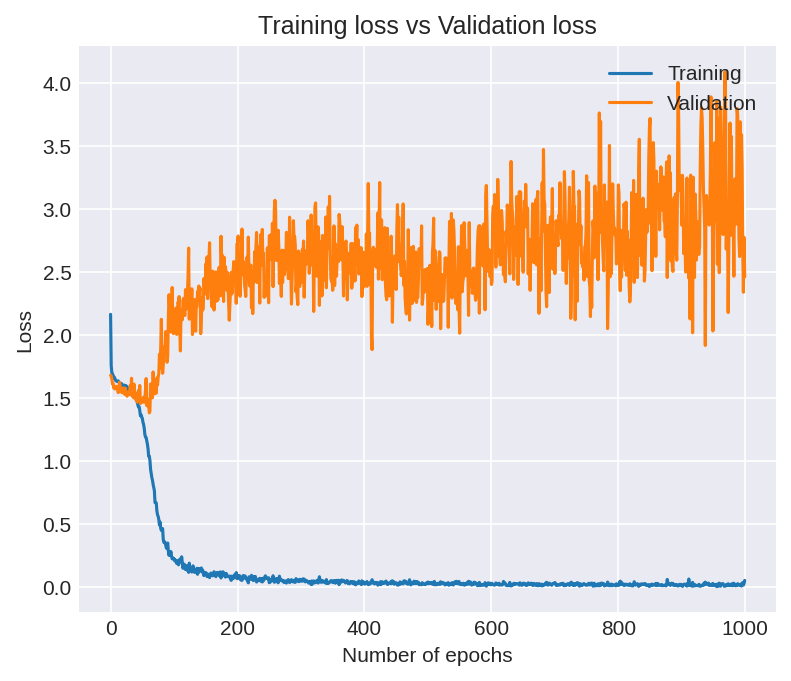

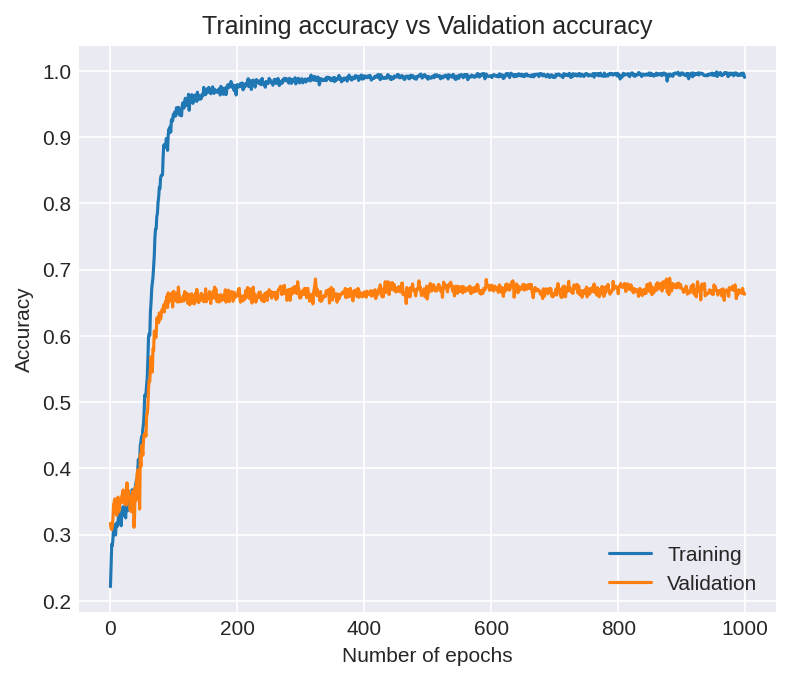

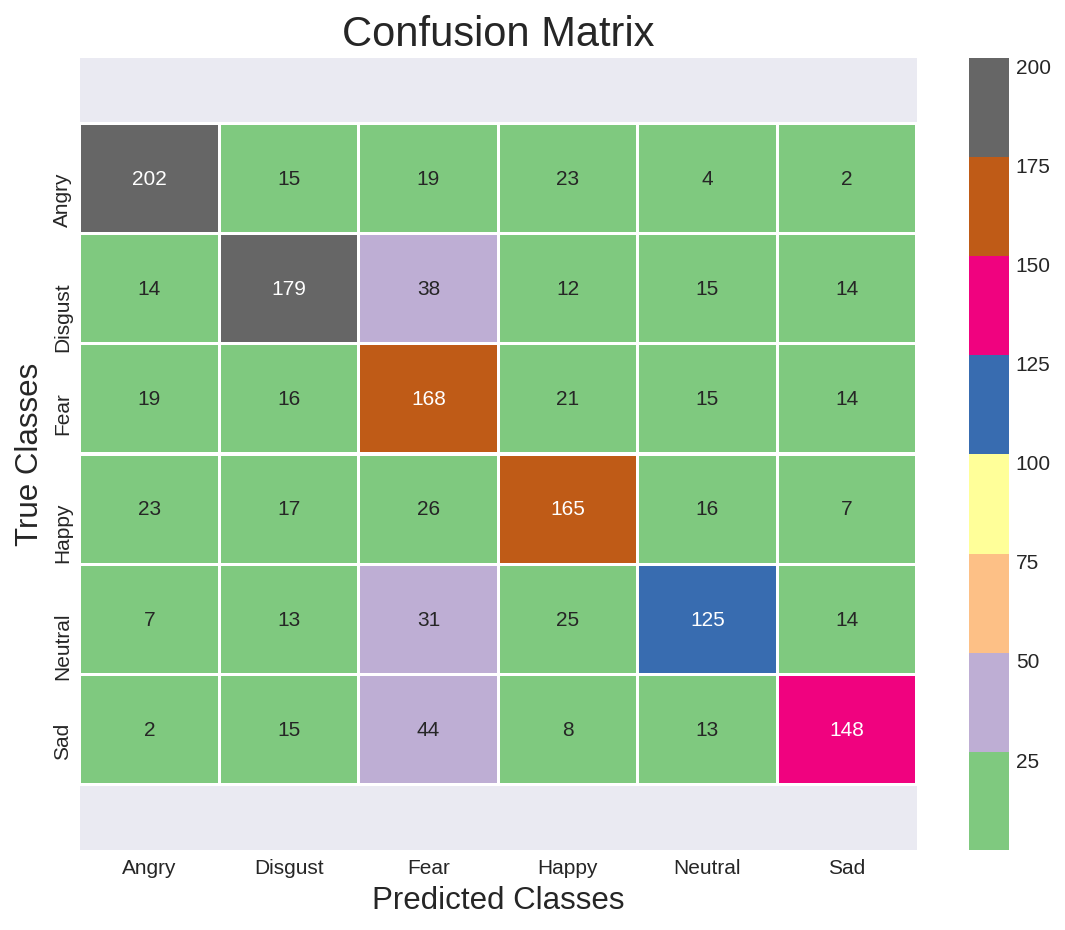

              precision    recall  f1-score   support

       Angry       0.76      0.76      0.76       265
     Disgust       0.70      0.66      0.68       272
        Fear       0.52      0.66      0.58       253
       Happy       0.65      0.65      0.65       254
     Neutral       0.66      0.58      0.62       215
         Sad       0.74      0.64      0.69       230

    accuracy                           0.66      1489
   macro avg       0.67      0.66      0.66      1489
weighted avg       0.67      0.66      0.66      1489



In [ ]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
# Plot the results
train_loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
train_acc=model_history.history['accuracy']
val_acc=model_history.history['val_accuracy']
plt.rcParams['figure.dpi'] = 150 
plt.figure(1,figsize=(6,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training loss vs Validation loss')
plt.grid(True)
plt.legend(['Training','Validation'], loc=1)
plt.style.use(['seaborn-darkgrid'])

plt.rcParams['figure.dpi'] = 150 
plt.figure(2,figsize=(6,5))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.grid(True)
plt.legend(['Training','Validation'],loc=4)
plt.style.use(['seaborn-darkgrid'])     
# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%") 

# PREDICTION LABELS
predictions = model.predict(X_test, batch_size=32)
predictions=predictions.argmax(axis=1)
predictions
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions}) 

# ACTUAL LABELS
TRUE = y_test.argmax(axis=1)
TRUE = TRUE.astype(int).flatten()
TRUE = (lb.inverse_transform((TRUE)))
TRUE = pd.DataFrame({'TRUE Values': TRUE})

# COMBINE PREDICTION AND ACTUAL LABELS
finaldf = TRUE.join(predictions)
finaldf[40:50] 
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(TRUE, predictions)
plt.figure(figsize = (9, 7))
plt.rcParams['figure.dpi'] = 150 
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()   
print(classification_report(TRUE, predictions, target_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad']))

In [ ]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
  model = tf.keras.Sequential()
  model.add(layers.Conv1D(64, kernel_size=(8),strides=1,dilation_rate=1,padding="same", activation='relu', input_shape=(X_train.shape[1],1)))
  model.add(layers.Conv1D(128, kernel_size=(8),strides=1,activation='relu',dilation_rate=1))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(6, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
  model.summary()
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  checkpoint = ModelCheckpoint("SER_best_initial_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', period=1, save_weights_only=True)
  model_history=model.fit(inputs[train], targets[train],batch_size=32, epochs=1000, validation_data=(X_test, y_test),callbacks=[checkpoint])
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  # Increase fold number
  fold_no = fold_no + 1
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Streaming output truncated to the last 5000 lines.
Epoch 772/1000
117/117 [==============================] - 2s 17ms/step - loss: 0.0297 - accuracy: 0.9950 - val_loss: 3.1078 - val_accuracy: 0.6602

Epoch 00772: val_accuracy did not improve from 0.68099
Epoch 773/1000
117/117 [==============================] - 2s 16ms/step - loss: 0.0242 - accuracy: 0.9938 - val_loss: 2.9654 - val_accuracy: 0.6602

Epoch 00773: val_accuracy did not improve from 0.68099
Epoch 774/1000
117/117 [==============================] - 2s 16ms/step - loss: 0.0149 - accuracy: 0.9964 - val_loss: 2.7991 - val_accuracy: 0.6615

Epoch 00774: val_accuracy did not improve from 0.68099
Epoch 775/1000
117/117 [==============================] - 2s 16ms/step - loss: 0.0082 - accuracy: 0.9978 - val_loss: 2.9792 - val_accuracy: 0.6588

Epoch 00775: val_accuracy did not improve from 0.68099
Epoch 776/1000
117/117 [==============================] - 2s 16ms/step - loss: 0.0136 - accuracy: 0.9954 - val_loss: 3.4048 - val_accurac

47/47 [==============================] - 0s 6ms/step - loss: 3.3200 - accuracy: 0.6662
Loss of the model is -  3.3200013637542725
47/47 [==============================] - 0s 5ms/step - loss: 3.3200 - accuracy: 0.6662
Accuracy of the model is -  66.62189364433289 %


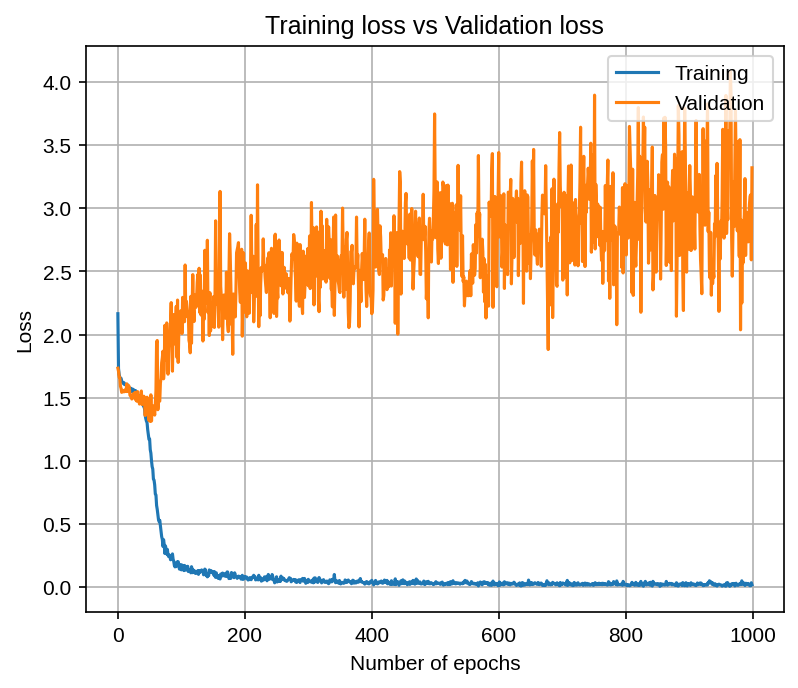

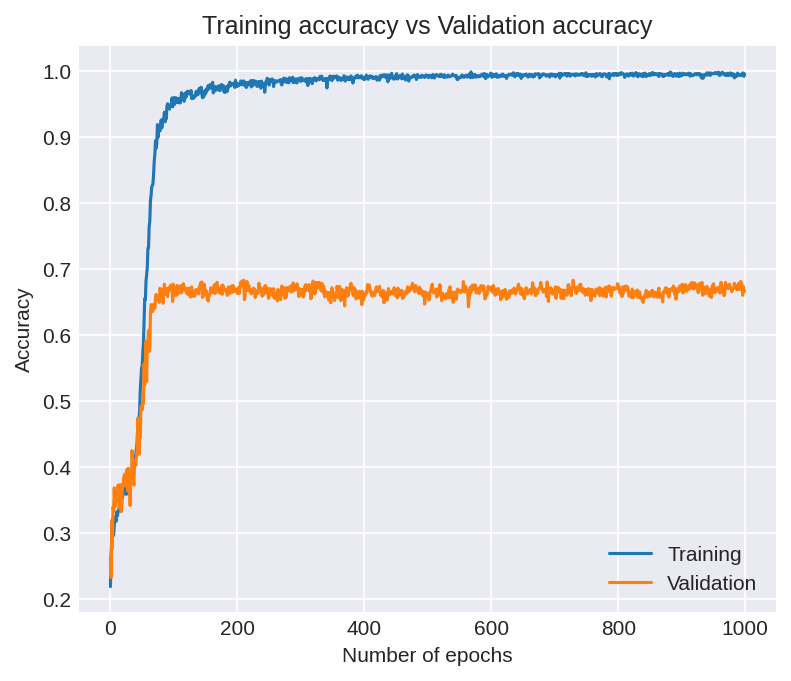

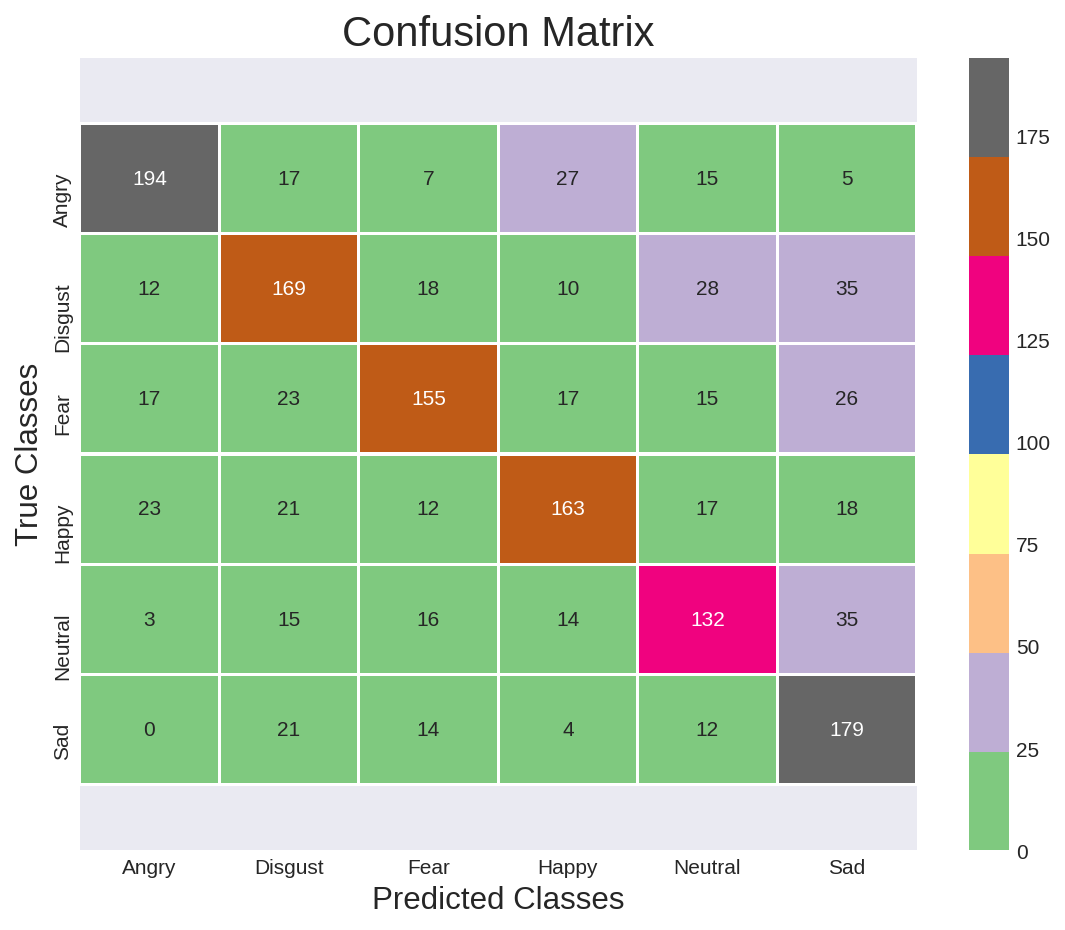

              precision    recall  f1-score   support

       Angry       0.78      0.73      0.75       265
     Disgust       0.64      0.62      0.63       272
        Fear       0.70      0.61      0.65       253
       Happy       0.69      0.64      0.67       254
     Neutral       0.60      0.61      0.61       215
         Sad       0.60      0.78      0.68       230

    accuracy                           0.67      1489
   macro avg       0.67      0.67      0.66      1489
weighted avg       0.67      0.67      0.67      1489



In [ ]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
# Plot the results
train_loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
train_acc=model_history.history['accuracy']
val_acc=model_history.history['val_accuracy']
plt.rcParams['figure.dpi'] = 150 
plt.figure(1,figsize=(6,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training loss vs Validation loss')
plt.grid(True)
plt.legend(['Training','Validation'], loc=1)
plt.style.use(['seaborn-darkgrid'])

plt.rcParams['figure.dpi'] = 150 
plt.figure(2,figsize=(6,5))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.grid(True)
plt.legend(['Training','Validation'],loc=4)
plt.style.use(['seaborn-darkgrid'])     
# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%") 

# PREDICTION LABELS
predictions = model.predict(X_test, batch_size=32)
predictions=predictions.argmax(axis=1)
predictions
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions}) 

# ACTUAL LABELS
TRUE = y_test.argmax(axis=1)
TRUE = TRUE.astype(int).flatten()
TRUE = (lb.inverse_transform((TRUE)))
TRUE = pd.DataFrame({'TRUE Values': TRUE})

# COMBINE PREDICTION AND ACTUAL LABELS
finaldf = TRUE.join(predictions)
finaldf[40:50] 
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(TRUE, predictions)
plt.figure(figsize = (9, 7))
plt.rcParams['figure.dpi'] = 150 
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()   
print(classification_report(TRUE, predictions, target_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad']))